# Introduction

Here I'm showing how to use the code for the PEPR model. See "Universal visitation law of human mobility law" paper at https://www.nature.com/articles/s41586-021-03480-9 for more details.

In [1]:
import copy
import pickle
import random
import time

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import seaborn as sns
import pandas as pd

from funcs import preferential_exploration, spatial_plot
%matplotlib inline


def run_PE(par: list) -> [dict, list, int]:
    """
    
    Runs the [referential exploration process.
    The parameters are fixed defined in the cell
    below and also in the function (lines 27).
    
    The data is stored as a dictionary where the
    key is a cell in the grid (index by 0, 1, 2...)
    and the value is a list of feature vectors
    for each visitor to that cell
    
    
    data[cell_id] = [ f_agent1, f_agent2 ] 
    
    where,
    
    f_agent1 = [agent_id, f;frequency of visit to cell, home cell , r;distance from home cell to cell , E = r*f]
    
    And so on.
    
    """
    
    # Parameters 
    [alpha, rho, gamma, R, nu, num_agents] = par
    num_steps, num_trials, box_size = 10**3, 1,1,

    # Iterate over different individuals
    Ngrid = 300;
    n_lower, n_upper = 100, 200
    possible_homes = [(i,j) for i in range(n_lower, n_upper) for j in range(n_lower,n_upper)]
    homes = [random.choice(possible_homes) for _ in range(num_agents)]

    # Do simulation
    data = {}
    t1 = time.time()
    for i,(x_start, y_start) in enumerate(homes):
        agent_id = i
        x_curr, y_curr = x_start, y_start
        data = preferential_exploration(num_steps,data,alpha,rho,gamma,R,nu,x_curr,y_curr, \
                                          agent_id,Ngrid,box_size)
    t2 = time.time()
    print('took {:.2f} mins'.format((t2-t1)/60.0))

    # Save data
    filename = 'data/EPE_lattice_alpha_{}_rho_{}_gamma_{}_R_{}_nu_{}_Nagent_{}.pkl'.format(alpha, \
                                                                            rho,gamma,R,nu,num_agents)
    with open(filename,'wb') as g:
        pickle.dump(data,g)
     
    # Plot data
    spatial_plot(data,homes,Ngrid)
        
    return data, homes, Ngrid

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:850: MatplotlibDeprecationWarning: 
The text.dvipnghack rcparam was deprecated in Matplotlib 2.1 and will be removed two minor releases later.
  version, name=key, obj_type="rcparam", alternative=alt_key)

Bad key "axes.color_cycle" on line 242 in
/Users/Kev/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Test for $N = 10^2$ agents

took 0.13 mins


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


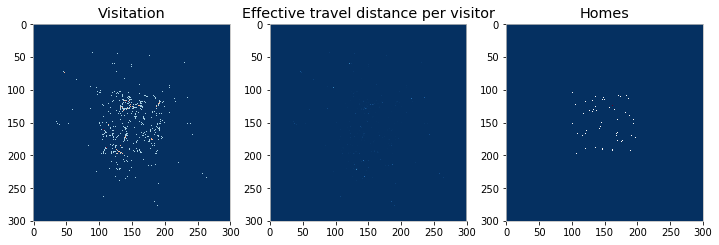

In [2]:
alpha, rho, gamma, R, nu, num_agents = 0.55, 0.6, 0.21, 10, 4, 10**2
par = [alpha, rho, gamma, R, nu, num_agents]
data, homes, Ngrid = run_PE(par)

### $N = 10^4$ agents

took 12.32 mins


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


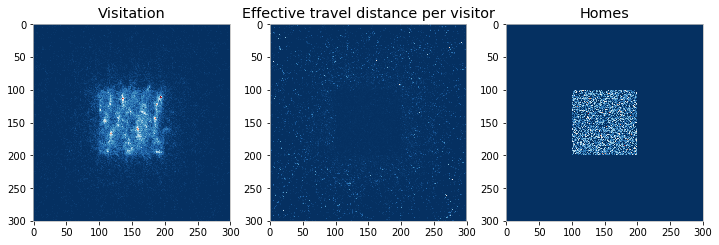

In [2]:
alpha, rho, gamma, R, nu, num_agents = 0.55, 0.6, 0.21, 10, 4, 10**4
par = [alpha, rho, gamma, R, nu, num_agents]
data, homes, Ngrid = run_PE(par)